# Student Performance Predections

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data collection


In [ ]:
dataset = pd.read_csv('/content/student.csv')

In [ ]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,yes,no,no,4,3,4,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,yes,yes,no,5,3,3,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,yes,no,4,3,2,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,yes,3,2,2,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,yes,no,no,4,3,2,5,4,yes


In [ ]:
dataset.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,passed
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,yes,no,no,5,5,4,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,yes,yes,no,2,4,5,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,yes,no,no,5,5,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,yes,yes,no,4,4,1,5,0,yes
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,yes,yes,yes,no,3,2,3,5,5,no


In [ ]:
dataset.shape

(395, 29)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

##Data Dictionary

---

This dataset approach students achievement in secondary education of two schools.

The data attributes, include demographic, social and school related features were collected by using school reports and questionnaires.

Before process the dataset let's describe it briefly:


1. ***school*** - student's school (binary: "GP" or "MS")
2. ***sex*** - student's sex (binary: "F" - female or "M" - male)
3. ***age*** - student's age (numeric: from 15 to 22)
4. ***address*** - student's home address type (binary: "U" - urban or "R" - rural)
5. ***famsize*** - family size (binary:
"LE3" - less or equal to 3 or "GT3" - greater than 3)
6. ***Pstatus*** - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. ***Medu*** - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. ***Fedu*** - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. ***Mjob*** - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. ***Fjob*** - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. ***reason*** - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. ***guardian*** - student's guardian (nominal: "mother", "father" or "other")
13. ***traveltime*** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. ***studytime*** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. ***failures*** - number of past class failures (numeric: n if 1<=n<3, else 4)
16. ***schoolsup*** - extra educational support (binary: yes or no)
17. ***famsup*** - family educational support (binary: yes or no)
18. ***paid*** - extra paid classes within the course subject (binary: yes or no)
19. ***activities*** - extra-curricular activities (binary: yes or no)
20. ***nursery*** - attended nursery school (binary: yes or no)
21. ***higher*** - wants to take higher education (binary: yes or no)
22. ***internet*** - Internet access at home (binary: yes or no)
23. ***romantic*** - with a romantic relationship (binary: yes or no)
24. ***famrel*** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. ***freetime*** - free time after school (numeric: from 1 - very low to 5 - very high)
26. ***goout*** - going out with friends (numeric: from 1 - very low to 5 - very high)
27. ***health*** - current health status (numeric: from 1 - very bad to 5 - very good)
28. ***absences*** - number of school absences (numeric: from 0 to 93)




29. ***passed*** : did the student pass the final exam or not (binary: yes or no)

###The last column tells us whether or not the student passes the final exam

# Data Preprocessing

##Handling missing value

In [ ]:
dataset.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
health        0
absences      0
passed        0
dtype: int64

In [ ]:
dataset.duplicated().sum()

0

***So, there are neither missing values nor duplicates in this dataset***

##Droping Unnecessary Columns

In [ ]:
dataset.drop(['school', 'address', 'famsize',
              'Pstatus', 'Mjob', 'Fjob', 'reason',
              'guardian', 'schoolsup', 'famsup','nursery'],
              axis=1, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   Medu        395 non-null    int64 
 3   Fedu        395 non-null    int64 
 4   traveltime  395 non-null    int64 
 5   studytime   395 non-null    int64 
 6   failures    395 non-null    int64 
 7   paid        395 non-null    object
 8   activities  395 non-null    object
 9   higher      395 non-null    object
 10  internet    395 non-null    object
 11  romantic    395 non-null    object
 12  famrel      395 non-null    int64 
 13  freetime    395 non-null    int64 
 14  goout       395 non-null    int64 
 15  health      395 non-null    int64 
 16  absences    395 non-null    int64 
 17  passed      395 non-null    object
dtypes: int64(11), object(7)
memory usage: 55.7+ KB


## Encoding Categorical Data

In [ ]:
dataset.select_dtypes(include='object')

,sex,paid,activities,higher,internet,romantic,passed
0,F,no,no,yes,no,no,no
1,F,no,no,yes,yes,no,no
2,F,yes,no,yes,yes,no,yes
3,F,yes,yes,yes,yes,yes,yes
4,F,yes,no,yes,no,no,yes
...,...,...,...,...,...,...,...
390,M,yes,no,yes,no,no,no
391,M,no,no,yes,yes,no,yes
392,M,no,no,yes,no,no,no
393,M,no,no,yes,yes,no,yes


In [ ]:
cat_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

for cat_feature in cat_features:
    print(f'Categories in {cat_feature} variable: ', end="")
    print(dataset[cat_feature].unique())

Categories in sex variable: ['F' 'M']
Categories in paid variable: ['no' 'yes']
Categories in activities variable: ['no' 'yes']
Categories in higher variable: ['yes' 'no']
Categories in internet variable: ['no' 'yes']
Categories in romantic variable: ['no' 'yes']
Categories in passed variable: ['no' 'yes']


***Since all of them are binary values, we are going to encode to integers (to 0, 1)***

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
dataset['sex'] = encoder.fit_transform(dataset['sex'])
dataset['paid'] = encoder.fit_transform(dataset['paid'])
dataset['activities'] = encoder.fit_transform(dataset['activities'])
dataset['higher'] = encoder.fit_transform(dataset['higher'])
dataset['internet'] = encoder.fit_transform(dataset['internet'])
dataset['romantic'] = encoder.fit_transform(dataset['romantic'])
dataset['passed'] = encoder.fit_transform(dataset['passed'])

In [ ]:
dataset['passed'].value_counts()

1    265
0    130
Name: passed, dtype: int64

In [ ]:
dataset

,sex,age,Medu,Fedu,traveltime,studytime,failures,paid,activities,higher,internet,romantic,famrel,freetime,goout,health,absences,passed
0,0,18,4,4,2,2,0,0,0,1,0,0,4,3,4,3,6,0
1,0,17,1,1,1,2,0,0,0,1,1,0,5,3,3,3,4,0
2,0,15,1,1,1,2,3,1,0,1,1,0,4,3,2,3,10,1
3,0,15,4,2,1,3,0,1,1,1,1,1,3,2,2,5,2,1
4,0,16,3,3,1,2,0,1,0,1,0,0,4,3,2,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,2,2,1,2,2,1,0,1,0,0,5,5,4,4,11,0
391,1,17,3,1,2,1,0,0,0,1,1,0,2,4,5,2,3,1
392,1,21,1,1,1,1,3,0,0,1,0,0,5,5,3,3,3,0
393,1,18,3,2,3,1,0,0,0,1,1,0,4,4,1,5,0,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex         395 non-null    int64
 1   age         395 non-null    int64
 2   Medu        395 non-null    int64
 3   Fedu        395 non-null    int64
 4   traveltime  395 non-null    int64
 5   studytime   395 non-null    int64
 6   failures    395 non-null    int64
 7   paid        395 non-null    int64
 8   activities  395 non-null    int64
 9   higher      395 non-null    int64
 10  internet    395 non-null    int64
 11  romantic    395 non-null    int64
 12  famrel      395 non-null    int64
 13  freetime    395 non-null    int64
 14  goout       395 non-null    int64
 15  health      395 non-null    int64
 16  absences    395 non-null    int64
 17  passed      395 non-null    int64
dtypes: int64(18)
memory usage: 55.7 KB


# Exploratory Data Analysis

In [ ]:
dataset.describe()

,sex,age,Medu,Fedu,traveltime,studytime,failures,paid,activities,higher,internet,romantic,famrel,freetime,goout,health,absences,passed
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.473418,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,0.458228,0.508861,0.949367,0.832911,0.334177,3.944304,3.235443,3.108861,3.554430,5.708861,0.670886
std,0.499926,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.498884,0.500555,0.219525,0.373528,0.472300,0.896659,0.998862,1.113278,1.390303,8.003096,0.470487
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,0.000000
50%,0.000000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,1.000000
75%,1.000000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,5.000000,8.000000,1.000000
max,1.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,75.000000,1.000000


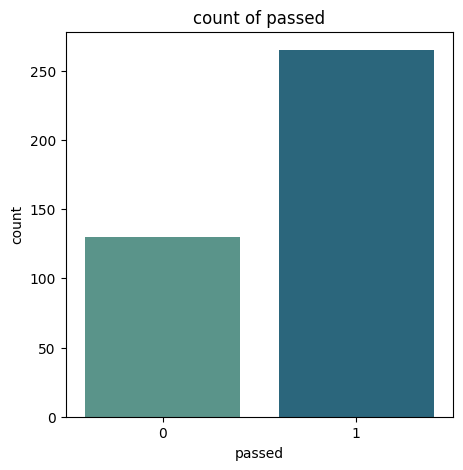

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='passed',data=dataset, palette='crest').set(xlabel='passed', ylabel='count', title='count of passed')

plt.show()

<Axes: xlabel='age', ylabel='Count'>

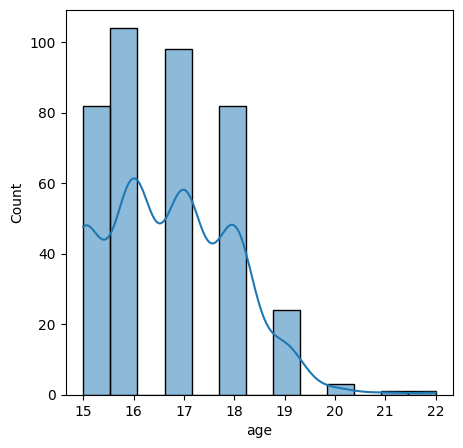

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(x='age', data=dataset, kde=True)

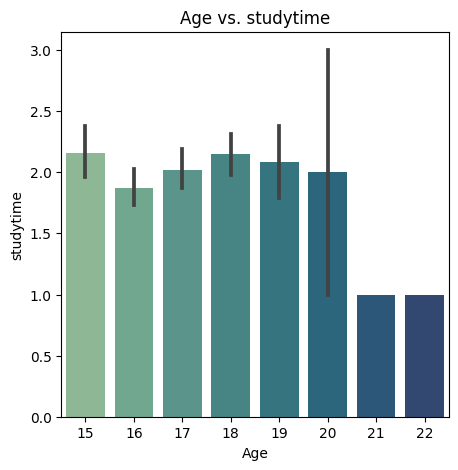

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(data=dataset, x='age', y='studytime', palette='crest').set(xlabel='Age', ylabel='studytime', title='Age vs. studytime')
plt.show()

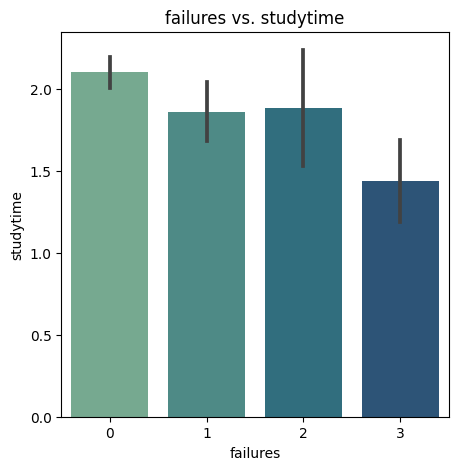

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(data=dataset, x='failures', y='studytime', palette='crest').set(xlabel='failures', ylabel='studytime', title='failures vs. studytime')
plt.show()

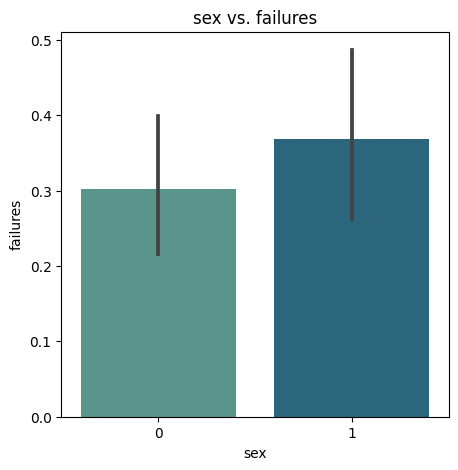

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(data=dataset, x='sex', y='failures', palette='crest').set(xlabel='sex', ylabel='failures', title='sex vs. failures')
plt.show()

<Axes: >

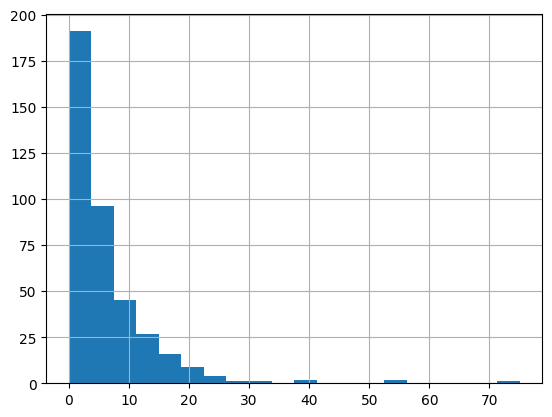

In [ ]:
dataset['absences'].hist(bins=20)

In [ ]:
corr_matrix = dataset.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

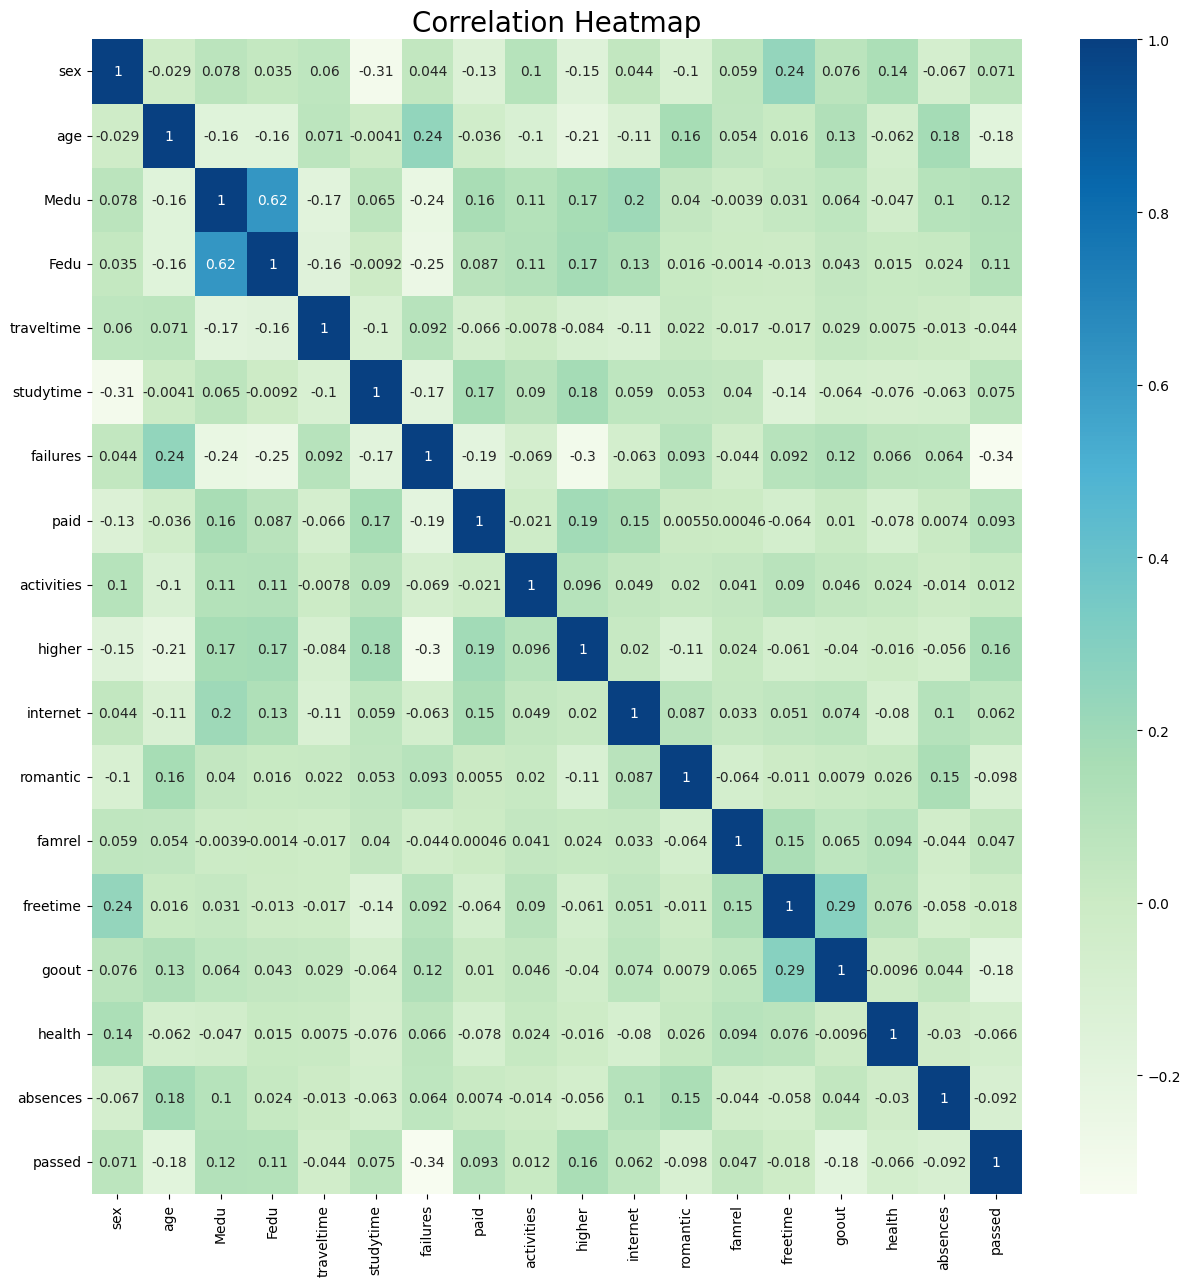

In [ ]:
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix,
            annot = True,
            cmap = 'GnBu')
plt.title('Correlation Heatmap', fontsize=20)

# Model Building and Training

#### Splitting Data into training and testing sets

In [ ]:
X = dataset.drop('passed', axis=1)
y = dataset['passed']

In [ ]:
X.shape, y.shape

((395, 17), (395,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316, 17), (79, 17), (316,), (79,))

#### Scailing Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataset)
dataset = scaler.transform(dataset)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 1.07906606, -0.58639605,  0.24643712, ..., -0.14439599,
        -0.36847328, -0.46440769],
       [ 1.07906606, -0.58639605, -0.68063585, ..., -0.14439599,
        -0.36847328, -0.70225668],
       [-0.92672732, -0.58639605, -1.60770883, ...,  1.64498172,
        -0.36847328, -0.70225668],
       ...,
       [-0.92672732,  1.77915057,  0.24643712, ...,  1.64498172,
         1.05149691,  1.08161077],
       [-0.92672732,  0.20211949,  1.17351009, ..., -0.14439599,
         0.34151182, -0.70225668],
       [ 1.07906606, -1.37491159,  1.17351009, ..., -0.14439599,
         1.05149691, -0.22655869]])

In [ ]:
X_test

array([[ 1.07906606,  0.20211949, -0.68063585, ..., -1.9337737 ,
        -0.36847328, -0.46440769],
       [ 1.07906606,  0.99063503, -1.60770883, ..., -0.14439599,
        -0.36847328, -0.34548319],
       [ 1.07906606,  0.99063503,  0.24643712, ..., -0.14439599,
         1.05149691,  0.24913929],
       ...,
       [ 1.07906606, -1.37491159, -0.68063585, ..., -1.03908484,
         1.05149691,  0.24913929],
       [-0.92672732, -1.37491159,  1.17351009, ..., -1.03908484,
         1.05149691, -0.46440769],
       [ 1.07906606,  0.20211949,  0.24643712, ...,  1.64498172,
         1.05149691,  1.20053527]])

## Importing Libraries for Algorithms & Evaluation

In [ ]:
#Libraries for the three algorithms we will use
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Function to evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## 1. Logistic Regression Algorithm

In [ ]:
logreg_model = LogisticRegression(max_iter=5000)

# Fit the model to the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
logreg_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", logreg_accuracy)

Accuracy: 0.7088607594936709


In [ ]:
print(classification_report(y_test, y_pred)) #precentage of the accuracy of model predection and evaluating the algorithm

              precision    recall  f1-score   support

           0       0.67      0.30      0.41        27
           1       0.72      0.92      0.81        52

    accuracy                           0.71        79
   macro avg       0.69      0.61      0.61        79
weighted avg       0.70      0.71      0.67        79



In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 8, 19],
       [ 4, 48]])

## 2. Random Forest Algorithm

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

Accuracy: 0.7341772151898734


In [ ]:
print(classification_report(y_test, y_pred)) #precentage of the accuracy of model predection and evaluating the algorithm

              precision    recall  f1-score   support

           0       0.71      0.37      0.49        27
           1       0.74      0.92      0.82        52

    accuracy                           0.73        79
   macro avg       0.73      0.65      0.65        79
weighted avg       0.73      0.73      0.71        79



## XGBoost Algorithm

In [ ]:
!pip install xgboost

In [ ]:
xgb = XGBClassifier(n_estimators = 200)
# Fit the model to the training data
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
xgboost_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", xgboost_accuracy)

Accuracy: 0.7468354430379747


In [ ]:
print(classification_report(y_test, y_pred)) #precentage of the accuracy of model predection and evaluating the algorithm

              precision    recall  f1-score   support

           0       0.71      0.44      0.55        27
           1       0.76      0.90      0.82        52

    accuracy                           0.75        79
   macro avg       0.73      0.67      0.69        79
weighted avg       0.74      0.75      0.73        79



### Visualize the Different Accuracies

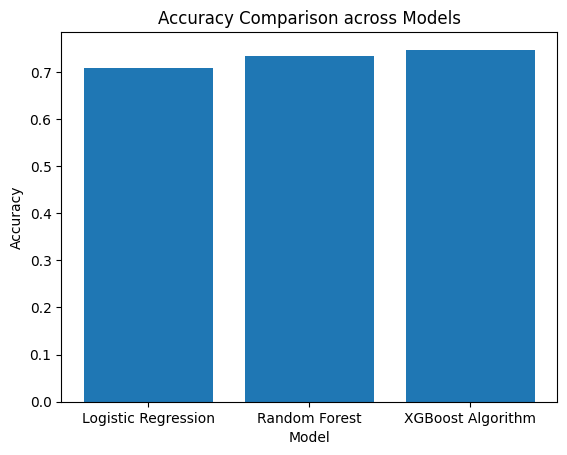

In [ ]:
import matplotlib.pyplot as plt

# List of accuracy values for different models or algorithms
accuracies = [logreg_accuracy, rf_accuracy, xgboost_accuracy]
models = ['Logistic Regression', 'Random Forest', 'XGBoost Algorithm']

# Creating the bar plot
plt.bar(models, accuracies)

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison across Models')

# Display the plot
plt.show()

# ***Thank you !***